In [10]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 32: Likelihood Ratio Tests

Last time, we introduced Likelihood Ratio tests. Recall that the point of a likelihood ratio test is to compare the likelihood function under a hypothesized value of the parameter with the liklihood function at its maximum. Instead of looking at the ratio $\Lambda$ itself, we often consider $-2\log \Lambda$ instead, since it has a handy distribution. 

### Example 1: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. Recall that the maximum likelihood estimate of $\lambda$ is $1\over\bar{X}$. We collect a random sample of size 20 and want to test the hypothesis $H_0: \lambda = 3$ vs $H_1: \lambda \neq 3$. Using the data in the python box below, conduct a likelihood ratio test on this hypothesis.  

In [11]:
mydata=np.array([0.18,0.277,0.105,0.126,0.225,0.026,0.123,0.423,0.006,0.281,0.050,0.692,0.105,0.275,0.346,0.079,0.045,0.222,0.063,0.281])

In [12]:
avg = np.mean(mydata)
avg
lambdae = 1/avg
lambdae

5.089058524173028

In [13]:
ts = [stats.expon.rvs(scale=1/3, size = 20) for i in np.arange(10000)]
ts
lambdats = 1/np.mean(ts)
lambdats

3.0090815475098047

In [15]:
elt = ((3**20)*(e**(-3*lambdats)))/((lambdae**20)*(e**(-lambdae*lambdats)))
elt

0.013794797876806675

We will reject the null hypothesis because of this low p-value of 0.13. 

#### Power

Suppose that the true value of $\lambda$ is 5. Let's determine the power of this test. Let $n=20$. Then determine the power if $n=50$. Remember, power is the probability of correctly rejecting the null hypothesis. 

First, find what value of $-2 \log \Lambda$ would lead you to reject $H_0$. This is sometimes called the critical value. 

In [17]:
crit = stats.chi2.ppf(0.95,1)
crit

3.841458820694124

Next, obtain the power. Obtain a sample of size 20 from the true population and obtain the value of $-2\log \Lambda$ for this sample. Repeat many times and determine how often you reject the null hypothesis. 

In [18]:
n = 20
l0 = 3
ts = []
for i in np.arange(1000): 
    data = stats.expon.rvs(size=n,scale = 1/5)
    test = -2*log((np.mean(data)**n)*(l0**n)*e**(-l0*sum(data)+n))
    ts = np.append(ts, test)
np.mean(ts>=crit)

0.603

Repeat for a sample size of 50. What do you expect to happen to power? 

In [19]:
n = 50
l0 = 3
ts = []
for i in np.arange(1000): 
    data = stats.expon.rvs(size=n,scale = 1/5)
    test = -2*log((np.mean(data)**n)*(l0**n)*e**(-l0*sum(data)+n))
    ts = np.append(ts, test)
np.mean(ts>=crit)

0.96

Since the sample size increased, I would expect the power to increase, which is what hapened. 

### A Different Test

We've explored hypothesis tests in this class before. Taking advantage of our computing power, we don't have to rely on test statistics with asymptotic distributions. Let's conduct a more direct hypothesis test using simulation. Recall:

$$
H_0: \lambda = 3
$$

$$
H_1: \lambda \neq 3
$$

Pick a different test statistic. Obtain an empirical distribution of that test statistic under $H_0$. Next, find the $p$-value by determining how often this test statistic is at or further away from the test statistic derived from the sample. Remember that this is a two-sided test. 

(array([ 27., 103., 228., 247., 200., 103.,  62.,  22.,   6.,   2.]),
 array([0.15040143, 0.2000802 , 0.24975897, 0.29943773, 0.3491165 ,
        0.39879527, 0.44847403, 0.4981528 , 0.54783157, 0.59751034,
        0.6471891 ]),
 <a list of 10 Patch objects>)

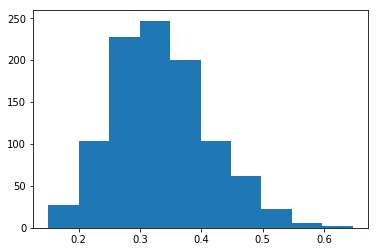

In [26]:
diffmean = np.mean(mydata)
ts = [np.mean(stats.expon.rvs(scale=1/3,size=20)) for i in np.arange(1000)]
plt.hist(ts)

How did the $p$-value compare to the LRT $p$-value? I wonder how the power of this test compares to our LRT. 

In [27]:
2*np.mean(ts<=diffmean)

0.048

#### Power

Let's figure out the power of this test. First, determine for what values of the test statistic would lead us to reject $H_0$. These values can be referred to as your rejection region. 

In [28]:
crit = stats.chi2.ppf(0.95,1)
crit
lower,upper = np.percentile(ts,[2.5,97.5])
print(lower)
print(upper)

0.1979523509811966
0.5067587095051984


Now, determine the power of this test. Like in the LRT case, obtain a sample of size 20 and obtain the test statistic. Repeat many times and see how often your test statistic is in your rejection region. 

In [9]:
lam0 = 3
ts = []
for i in np.arange(10000):
    simdata = stats.expon.rvs(scale = 1/5, size = 20)
    teststat = -2*log((np.mean(simdata)**20)*(lam0**20)*e**(-lam0*sum(simdata)+20))
    ts = np.append(ts,teststat)
    
np.mean(ts>=crit)

0.5939

(array([  7.,  40., 165., 289., 244., 135.,  78.,  32.,   6.,   4.]),
 array([0.07306664, 0.10402134, 0.13497603, 0.16593073, 0.19688542,
        0.22784011, 0.25879481, 0.2897495 , 0.3207042 , 0.35165889,
        0.38261359]),
 <a list of 10 Patch objects>)

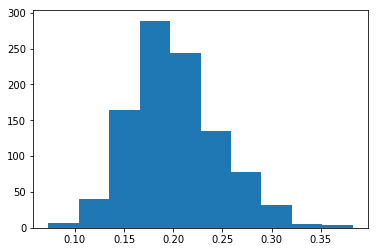

In [30]:
percts = [np.mean(stats.expon.rvs(scale=1/5,size=20)) for i in np.arange(1000)] 
plt.hist(percts)

Repeat for a sample size of 50. Note that you will have to obtain new critical values in order to do this.  

In [32]:
ts = [np.mean(stats.expon.rvs(scale=1/3, size = 50)) for i in np.arange(1000)]
lower,upper= np.percentile(ts,[2.5,97.5])
percts=[np.mean(stats.expon.rvs(scale=1/5,size=50)) for i in np.arange(1000)]
np.mean(percts<=lower)+np.mean(percts>=upper)

0.944

In [31]:
ts = [np.mean(stats.expon.rvs(scale=1/3, size = 20)) for i in np.arange(1000)]
lower,upper= np.percentile(ts,[2.5,97.5])
percts=[np.mean(stats.expon.rvs(scale=1/5,size=20)) for i in np.arange(1000)]
np.mean(percts<=lower)+np.mean(percts>=upper)

0.581